<a href="https://colab.research.google.com/github/kayliegupta/ToxicContentClassification/blob/main/edDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

from collections import Counter


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
file_path = '/content/gdrive/MyDrive/data.csv'
df = pd.read_csv(file_path)
df.head()

,id,label,text
0,1_0,0,find out more here
1,2_0,0,i had a long battle with anorexia
2,3_0,0,those thoughts telling me that if i just lost...
3,4_0,0,the trouble is that never happened
4,5_0,0,there was never a magic number


In [ ]:
df.shape


(3369, 3)

In [ ]:
input = df["text"]
output = df["label"]

comments_train, comments_test, y_train, y_test = train_test_split(input, output, test_size=0.20)

y_train.head()

1635    1
1882    1
1916    1
2191    1
699     0
Name: label, dtype: int64

In [ ]:
comments_train.head

<bound method NDFrame.head of 1635                                     we’re not a cult
1882    through prayer, fasting and meditation i will ...
1916              in a similar way, don’t be disappointed
2191     this will retain all the water and make purgi...
699      some men and women will try just about anythi...
                              ...                        
206      how do i begin recovery from an eating disord...
3189    do not try crushing the food in your hands and...
3368     everyone aims to have a thin body and these d...
2148     himet saysjuly 31, 2019 at 1:51 amhi there ev...
693      in some cases, an older adult may have suffer...
Name: text, Length: 2695, dtype: object>

In [ ]:
comments_train.shape


(2695,)

In [ ]:
comments_test.shape

(674,)

In [ ]:
vectorizer = TfidfVectorizer(max_features=2500, min_df=8, max_df=0.8) #vectorizing the data
vectorizer.fit(comments_train)


def tokenize(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct): # -PRON- is a special all inclusive "lemma" spaCy uses for any pronoun, we want to exclude these
            clean_tokens.append(token.lemma_)
    return clean_tokens


x_train = vectorizer.transform(comments_train)
x_test = vectorizer.transform(comments_test)



In [ ]:
pd.DataFrame(x_train.toarray())

,0,1,2,3,4,5,6,7,8,9,...,681,682,683,684,685,686,687,688,689,690
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.18091,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.250062,0.0,0.0,0.0,0.0,0.275402,0.0,0.118735,0.0
2691,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.296970,0.0
2692,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.144071,0.0,0.000000,0.0
2693,0.0,0.0,0.0,0.0,0.269339,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


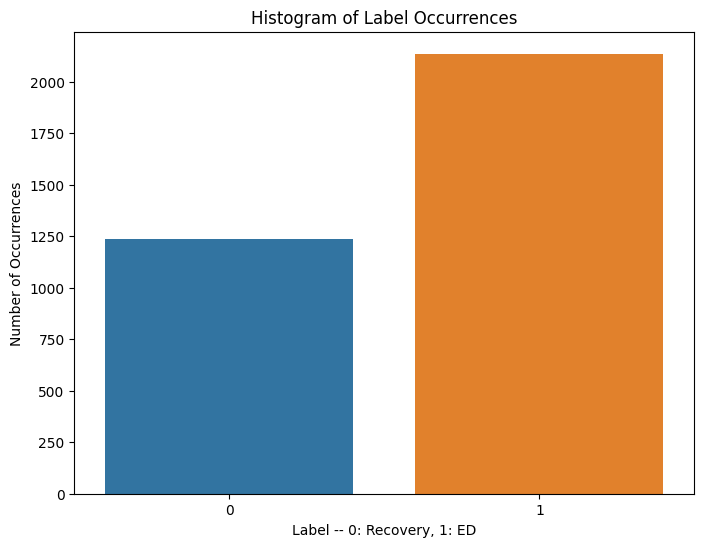

In [ ]:
label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))  # Set the figure size
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label -- 0: Recovery, 1: ED')
plt.ylabel('Number of Occurrences')
plt.title('Histogram of Label Occurrences')
plt.show()

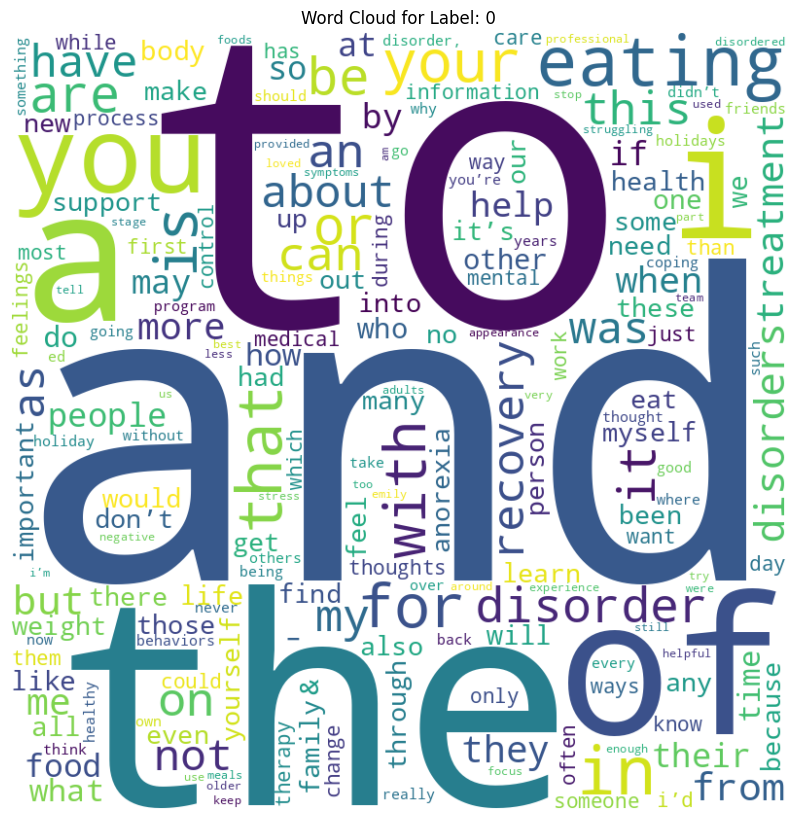

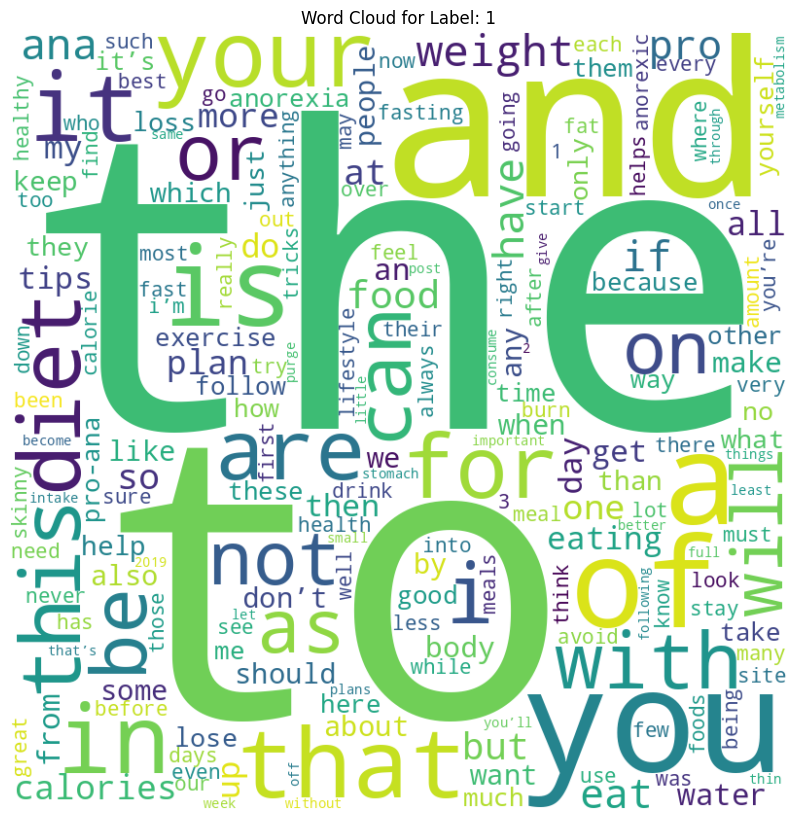

In [ ]:

# Group the data by labels
grouped_data = df.groupby('label')

# Iterate through groups and create word clouds
for label, group in grouped_data:
    text = ' '.join(group['text'])  # Combine text from all rows in the group
    word_frequencies = Counter(text.split())  # Count word frequencies

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_frequencies)

    # Display and save the word cloud
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Label: {label}')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


In [ ]:
#calculate lenght of text

Creating a Baseline Classifier

In [ ]:
logistic_model = LogisticRegression()

logistic_model.fit(x_train, y_train)

LogisticRegression()

0.8798219584569733
Precision 0.8802979895521523
F1 0.8769695056506093
Recall 0.8798219584569733
tn: 171 fp: 59 fn: 22 tp: 422


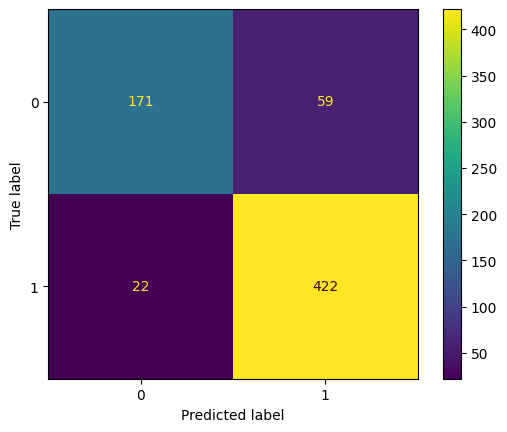

In [ ]:
pred_logistic = logistic_model.predict(x_test)
accuracy_logistic = accuracy_score(pred_logistic, y_test)
print (accuracy_logistic)

print ("Precision", precision_score(y_test, pred_logistic, average='weighted'))
print ("F1", f1_score(y_test, pred_logistic, average='weighted'))
print ("Recall", recall_score(y_test, pred_logistic, average='weighted'))

cm_logistic = confusion_matrix(y_test, pred_logistic)

tn, fp, fn, tp = cm_logistic.ravel()

print("tn:", tn,"fp:", fp, "fn:", fn, "tp:", tp)

disp = ConfusionMatrixDisplay (confusion_matrix = cm_logistic, display_labels= None)
disp.plot()
plt.show()

#cm = confusion_matrix(y_true, y_pred, labels=["dog", "marshmallow"])
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["dog", "marshmallow"])
#disp.plot(cmap='Oranges');

In [ ]:
ridge_model = RidgeClassifier(max_iter = 4, random_state=0)

ridge_model.fit(x_train, y_train)

RidgeClassifier(max_iter=4, random_state=0)

0.8827893175074184
Precision 0.8823498769538359
F1 0.8806994206139237
Recall 0.8827893175074184
tn: 176 fp: 54 fn: 25 tp: 419


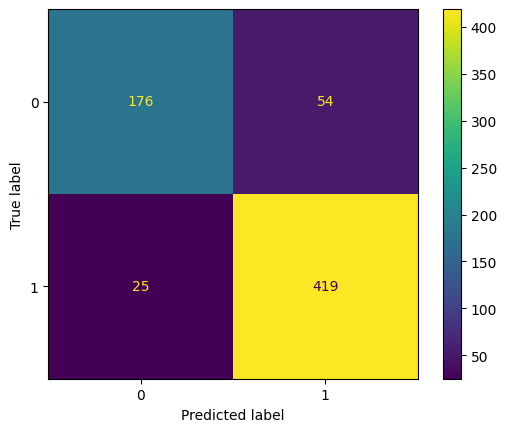

In [ ]:
pred_ridge = ridge_model.predict(x_test)
accuracy_ridge = accuracy_score(pred_ridge, y_test)
print (accuracy_ridge)

print ("Precision", precision_score(y_test, pred_ridge, average='weighted'))
print ("F1", f1_score(y_test, pred_ridge, average='weighted'))
print ("Recall", recall_score(y_test, pred_ridge, average='weighted'))


cm_ridge = confusion_matrix(y_test, pred_ridge)

tn, fp, fn, tp = cm_ridge.ravel()


print("tn:", tn,"fp:", fp, "fn:", fn, "tp:", tp)

disp = ConfusionMatrixDisplay (confusion_matrix = cm_ridge, display_labels= None)
disp.plot()
plt.show()

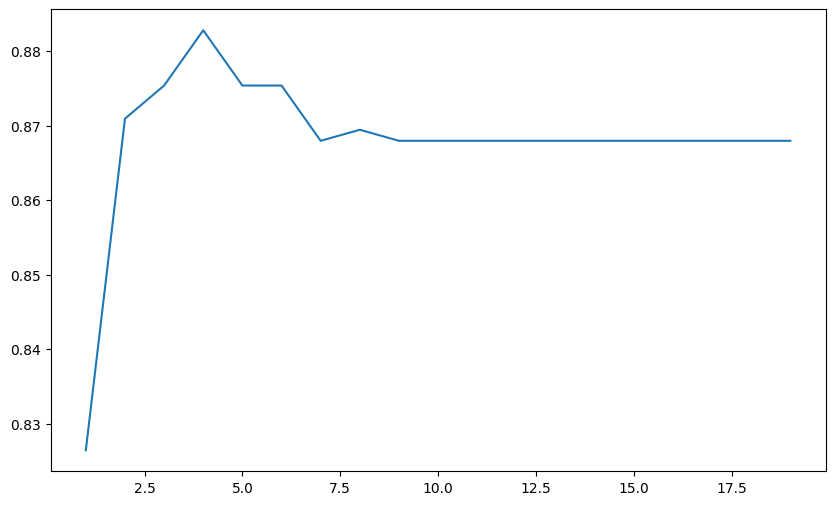

In [ ]:
ridgemod_values = []

for k in range(1,20):
  ridge_mod_model = RidgeClassifier(max_iter = k, random_state=0)
  ridge_mod_model.fit(x_train, y_train)
  predictions_ridgemod = ridge_mod_model.predict(x_test)
  accuracy_ridgemod = accuracy_score(predictions_ridgemod, y_test)
  ridgemod_values.append(accuracy_ridgemod)


plt.figure(figsize=(10,6))
plt.plot(range(1,20), ridgemod_values)

#2

In [ ]:
rf_model = RandomForestClassifier ()

rf_model.fit(x_train, y_train)

RandomForestClassifier()

0.8486646884272997
Pricision 0.8470902980712293
F1 0.8454158332462252
Recall 0.8486646884272997
tn: 162 fp: 68 fn: 34 tp: 410


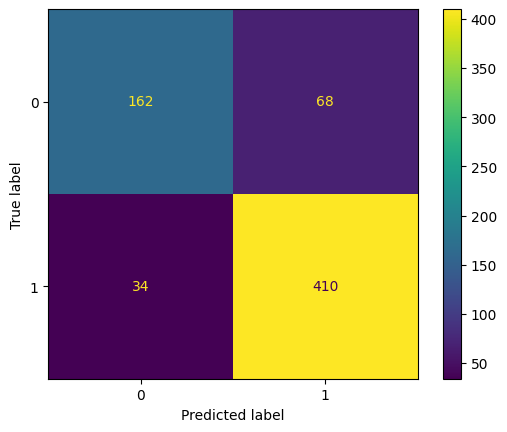

In [ ]:
pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(pred_rf, y_test)
print (accuracy_rf)

print ("Pricision", precision_score(y_test, pred_rf, average='weighted'))
print ("F1", f1_score(y_test, pred_rf, average='weighted'))
print ("Recall", recall_score(y_test, pred_rf, average='weighted'))


cm_rf = confusion_matrix(y_test, pred_rf)

tn, fp, fn, tp = cm_rf.ravel()

print("tn:", tn,"fp:", fp, "fn:", fn, "tp:", tp)

disp = ConfusionMatrixDisplay (confusion_matrix = cm_rf, display_labels= None)
disp.plot()
plt.show()

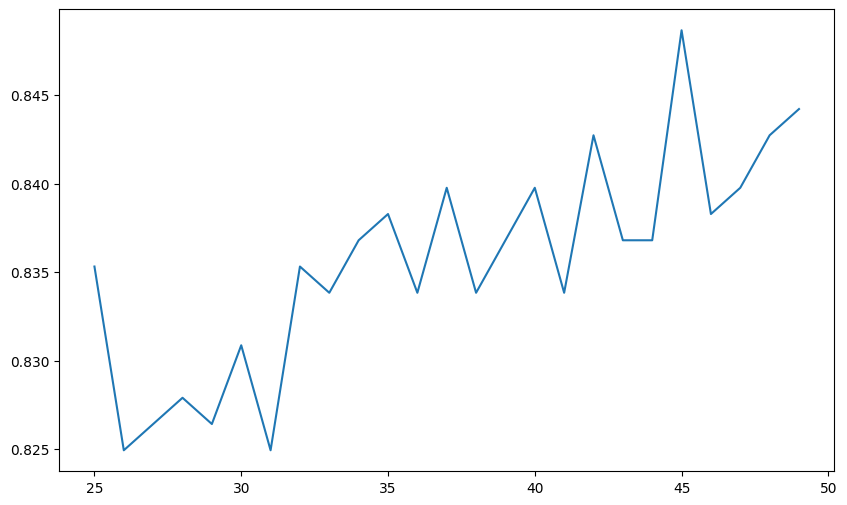

In [ ]:
rfmod_values = []

for k in range(25, 50):
  rf_mod_model = RandomForestClassifier(max_depth = k, random_state=0)
  rf_mod_model.fit(x_train, y_train)
  predictions_rfmod = rf_mod_model.predict(x_test)
  accuracy_rfmod = accuracy_score(predictions_rfmod, y_test)
  rfmod_values.append(accuracy_rfmod)


plt.figure(figsize=(10,6))
plt.plot(range(25,50), rfmod_values)

#~46 max depth

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=18, random_state=0)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=18, random_state=0)

0.7893175074183977
Precision 0.7893408441804399
F1 0.7763138531983762
Recall 0.7893175074183977
tn: 120 fp: 110 fn: 32 tp: 412


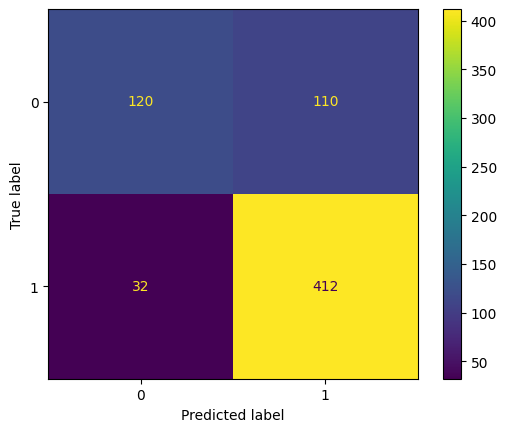

In [ ]:
pred_dt = dt_model.predict(x_test)
accuracy_dt = accuracy_score(pred_dt, y_test)
print (accuracy_dt)

print ("Precision", precision_score(y_test, pred_dt, average='weighted'))
print ("F1", f1_score(y_test, pred_dt, average='weighted'))
print ("Recall", recall_score(y_test, pred_dt, average='weighted'))

cm_dt = confusion_matrix(y_test, pred_dt)


tn, fp, fn, tp = cm_dt.ravel()

print ("tn:", tn,"fp:", fp, "fn:", fn, "tp:", tp)


disp = ConfusionMatrixDisplay (confusion_matrix = cm_dt, display_labels= None)
disp.plot()
plt.show()

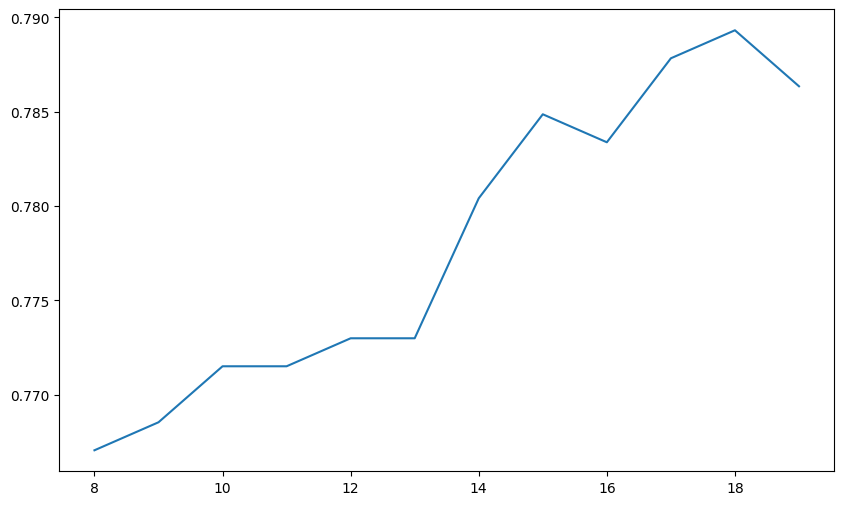

In [ ]:
dtmod_values = []

for k in range(8,20):
  dt_mod_model = DecisionTreeClassifier(max_depth=k, random_state=0)
  dt_mod_model.fit(x_train, y_train)
  predictions_dtmod = dt_mod_model.predict(x_test)
  accuracy_dtmod = accuracy_score(predictions_dtmod, y_test)
  dtmod_values.append(accuracy_dtmod)


plt.figure(figsize=(10,6))
plt.plot(range(8,20), dtmod_values)


#13 highest accuracy

In [ ]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

SVC Model
Accuracy: 0.884272997032641
Precision: 0.8851843928405794
F1: 0.881437067691707
Recall: 0.884272997032641


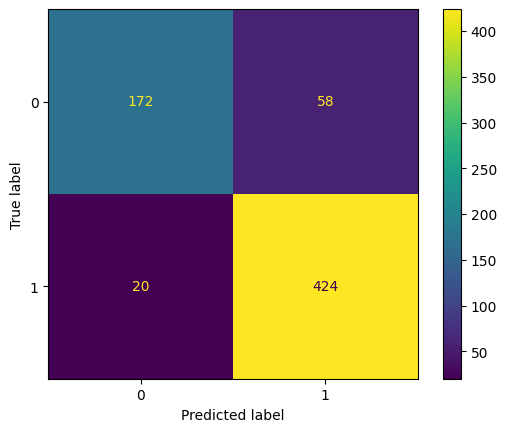

tn: 172 fp: 58 fn: 20 tp: 424


In [ ]:
pred_svc = svc_model.predict(x_test)
accuracy_svc = accuracy_score(pred_svc, y_test)
print("SVC Model")
print ("Accuracy:", accuracy_svc)

print ("Precision:", precision_score(y_test, pred_svc, average='weighted'))
print ("F1:", f1_score(y_test, pred_svc, average='weighted'))
print ("Recall:", recall_score(y_test, pred_svc, average='weighted'))


cm_svc = confusion_matrix(y_test, pred_svc)

tn, fp, fn, tp = cm_svc.ravel()

disp = ConfusionMatrixDisplay (confusion_matrix = cm_svc, display_labels= None)
disp.plot()
plt.show()

print ("tn:", tn,"fp:", fp, "fn:", fn, "tp:", tp)

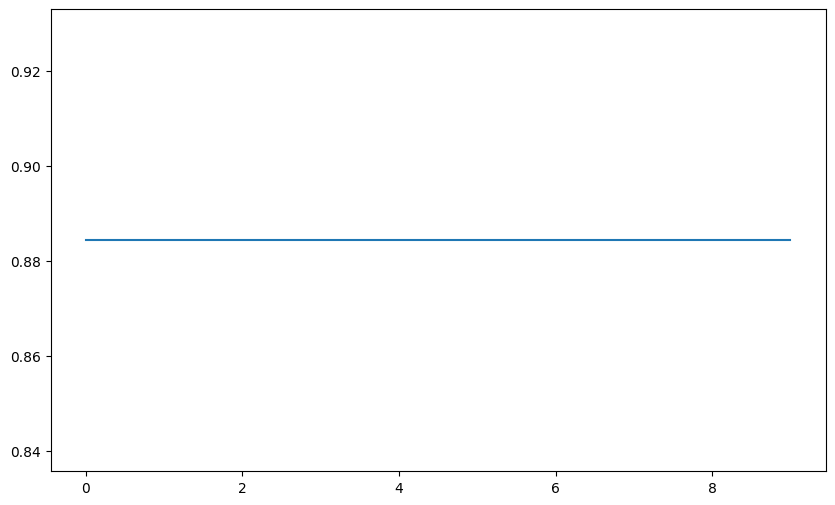

In [ ]:
svcmod_values = []

for k in range(10):
  svc_mod_model = SVC(degree = k, random_state=0)
  svc_mod_model.fit(x_train, y_train)
  predictions_svcmod = svc_mod_model.predict(x_test)
  accuracy_svcmod = accuracy_score(predictions_svcmod, y_test)
  svcmod_values.append(accuracy_svcmod)


plt.figure(figsize=(10,6))
plt.plot(range(10), svcmod_values)
